<a href="https://colab.research.google.com/github/arquansa/PSTB-exercises/blob/main/Week07/Day1/DC1/W7D1DC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Daily Challenge : Text Analysis of books using word cloud

Text preprocessing
For this exercises we will be using NLTK and spaCy

The corpus will be the Lewis Carrol books:

Alice’s Adventures in Wonderland

THROUGH THE LOOKING-GLASS And What Alice Found There

A Tangled Tale


1. Using requests to access the contents online, create a function load_texts().This function should recive a list of urls, load them, clean non-words using regular expressions and append the cleaned text to the corpus that will be returned.

2. Print the first 200 characteres of each text.

Are there parts of the text that are not relevant to the analysis? If so, you need to remove them.

hint: You can use slicing to start and stop the text where you need (ignoring autoral credits in the begining and end) looking for the following phrases:

‘ START’
‘ END’

3. Tokenize the text and print the first 150 tokens of each book

4. Remove stopwords using NLTK. Check that they were removed using count() and looking for some of the stop words like: ‘i’, ‘me’, ‘my’, ‘myself’, ‘we’, ‘our’, ‘ours’, ‘ourselves’, etc.

5. Using PorterStemmer(), print the first 50 stemmed tokens

6. Using spaCy pre-trained model ‘en_core_web_sm’ to load and print the first 50 lemmatized tokens. Hint: in spaCy the lemmatized token can be accessed as attribute.

7. Analyse the difference between the stemmed and lemmatized tokens. What is different and why?

8. Using NLTK, identify POS tags od each text.

9. Using NLTK identify all the entities of each text

Analysing the text
1. Using wordcloud and matplotlib, display a word cloud of each book.

The output will look like this (maybe not exactly):


word-cloud

2. Use BoW method to check the five most frequent words in all the books

hint: What will be the best text from the preprocess step? (raw text, stemmed, lemmarized, etc)?

3. Print the BoW and identify the numbers: What is the document number? What is the index and what is how many times the word was found?

4. Display a pie plot of the 5 most frequent words in the text. Add the word and its frequence as labels.

5. Analyse the outputs: Are those words informative? Are they insightful or expected?


image-3


Solving the frequency problem using TF-IDF
When we create a BoW out from some text, all the words are treated equaly as importants. Like “Alice” or “say” in a fantasy book about Alice. We expected those words to be repeated all over the book, making them not so informative to us.

The solution for this problem would be to consider the frequency relative to the corpus. In this case, if there is a word in a document that doesn’t appears much in the other documents, it is likely meaningful and should be considered more important. And the same way in the oposite: A word that is repeated a lot in all the documents will be considered less important.

That’s the perfect situation to use TF-IDF (Term Frequency-Inverse Document Frequency)

1. Create another BoW, now using TF-IDF as vectorizer.

hint: You need to pass min_df=1, max_df=2 as arguments of the TfidfVectorizer(), because we are using a small dataset.

2. Create again the pie plots with the new 5 most relevant words from each document.

Asset :
Alice’s Adventures in Wonderland

THROUGH THE LOOKING-GLASS And What Alice Found There

A Tangled Tale


In [115]:
!pip install nltk spacy wordcloud matplotlib

In [116]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 23.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [117]:
import nltk

# Force download to the default path where NLTK looks
nltk.download('punkt', download_dir='C:/Users/AQS_PSTB/AppData/Roaming/nltk_data')

[nltk_data] Downloading package punkt to
[nltk_data]     C:/Users/AQS_PSTB/AppData/Roaming/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [119]:
# Import necessary libraries for text preprocessing, word cloud generation and visualization
import nltk
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load English tokenizer, tagger, parser, NER, and word vectors from spaCy
nlp = spacy.load('en_core_web_sm')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [120]:
!pip install requests

In [121]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

Define load_texts() function

In [122]:
import requests

def load_texts(urls):
    """
    Fetches and combines plain text content from a list of URLs.

    Parameters:
        urls (list): A list of URLs to text files.

    Returns:
        str: The combined text from all URLs.
    """
    combined_text = ""

    for url in urls:
        try:
            response = requests.get(url)
            response.raise_for_status()  # Ensure successful response
            combined_text += response.text + "\n\n"
        except requests.RequestException as e:
            print(f"Failed to load {url}: {e}")

    return combined_text


In [123]:
urls = [
    "https://www.gutenberg.org/files/11/11-0.txt",       # Alice’s Adventures in Wonderland
    "https://www.gutenberg.org/files/12/12-0.txt",       # Through the Looking-Glass
    "https://www.gutenberg.org/files/19033/19033-0.txt"  # A Tangled Tale
]

# Call the function
full_text = load_texts(urls)

In [124]:
import requests
import re

def load_texts(urls):
    """
    Downloads text from given URLs, cleans non-word characters,
    and returns a single cleaned corpus string.

    Parameters:
        urls (list): List of URLs to plain text files.

    Returns:
        str: Cleaned and combined text content.
    """
    corpus = ""

    for url in urls:
        try:
            response = requests.get(url)
            response.raise_for_status()
            text = response.text

            # Clean the text: remove non-words, keep letters and whitespace
            cleaned_text = re.sub(r'[^A-Za-z\s]', '', text)

            # Normalize whitespace (e.g., multiple spaces -> one space)
            cleaned_text = re.sub(r'\s+', ' ', cleaned_text)

            corpus += cleaned_text + " "

        except requests.RequestException as e:
            print(f"Failed to load {url}: {e}")

    return corpus.strip()


2. Print the first 200 characters of each text

In [125]:
import requests
import re

def load_texts(urls):
    """
    Downloads and cleans text from each URL.
    Prints the first 200 characters of each cleaned text before combining them.

    Parameters:
        urls (list): List of URLs to text files.

    Returns:
        str: Combined cleaned corpus.
    """
    corpus = ""

    for i, url in enumerate(urls):
        try:
            response = requests.get(url)
            response.raise_for_status()
            text = response.text

            # Clean text
            cleaned_text = re.sub(r'[^A-Za-z\s]', '', text)
            cleaned_text = re.sub(r'\s+', ' ', cleaned_text)

            # Print the first 200 characters of the cleaned text
            print(f"\n Preview of cleaned text {i+1} ({url}):\n")
            print(cleaned_text[:200])

            # Append to corpus
            corpus += cleaned_text + " "

        except requests.RequestException as e:
            print(f" Failed to load {url}: {e}")

    return corpus.strip()


In [126]:
import requests
import re

def display_clean_excerpt(urls):
    """
    Downloads each book from the given URLs, slices content between START and END markers,
    and prints the first 200 characters of the cleaned main text.

    Parameters:
        urls (list): List of URLs to plain text books.
    """
    for i, url in enumerate(urls):
        try:
            response = requests.get(url)
            response.raise_for_status()
            text = response.text

            # Try to locate start and end of the actual content
            start_match = re.search(r'\*\*\* START OF THIS PROJECT GUTENBERG EBOOK.*?\n', text, re.IGNORECASE)
            end_match = re.search(r'\*\*\* END OF THIS PROJECT GUTENBERG EBOOK.*?\n', text, re.IGNORECASE)

            if start_match and end_match:
                start_idx = start_match.end()
                end_idx = end_match.start()
                main_text = text[start_idx:end_idx]
            else:
                # Fallback: use whole text if markers aren't found
                main_text = text

            # Clean text (optional)
            main_text = re.sub(r'[^A-Za-z\s]', '', main_text)
            main_text = re.sub(r'\s+', ' ', main_text)

            # Print preview
            print(f"\n📘 Book {i+1} ({url}):\n")
            print(main_text[:200])

        except requests.RequestException as e:
            print(f"❌ Failed to load {url}: {e}")


3. Tokenize the text and print the first 150 tokens of each book using NLTK


In [127]:
import requests
import re
import nltk
from nltk.tokenize import word_tokenize

# Make sure necessary NLTK resources are available
nltk.download('punkt')

def tokenize_and_display(urls):
    """
    Downloads, slices, tokenizes, and displays the first 150 tokens from each book.
    """
    for i, url in enumerate(urls):
        try:
            response = requests.get(url)
            response.raise_for_status()
            text = response.text

            # Slice content between START and END markers
            start_match = re.search(r'\*\*\* START OF THIS PROJECT GUTENBERG EBOOK.*?\n', text, re.IGNORECASE)
            end_match = re.search(r'\*\*\* END OF THIS PROJECT GUTENBERG EBOOK.*?\n', text, re.IGNORECASE)

            if start_match and end_match:
                main_text = text[start_match.end():end_match.start()]
            else:
                main_text = text  # fallback to full text

            # Tokenize using NLTK
            tokens = word_tokenize(main_text)

            # Print first 150 tokens
            print(f"\n📘 Book {i+1} ({url}):\n")
            print(tokens[:150])

        except requests.RequestException as e:
            print(f"❌ Failed to load {url}: {e}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


4. Remove stopwords using NLTK using count()

In [128]:
import requests
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

def tokenize_and_remove_stopwords(urls):
    """
    Downloads text from URLs, tokenizes, removes stopwords, and prints first 150 filtered tokens.
    Also checks that common stopwords are removed.
    """
    # Get English stopwords
    stop_words = set(stopwords.words('english'))

    # Stopwords to check
    check_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves']

    for i, url in enumerate(urls):
        try:
            response = requests.get(url)
            response.raise_for_status()
            text = response.text

            # Extract content between Gutenberg START and END
            start_match = re.search(r'\*\*\* START OF THIS PROJECT GUTENBERG EBOOK.*?\n', text, re.IGNORECASE)
            end_match = re.search(r'\*\*\* END OF THIS PROJECT GUTENBERG EBOOK.*?\n', text, re.IGNORECASE)

            if start_match and end_match:
                main_text = text[start_match.end():end_match.start()]
            else:
                main_text = text

            # Tokenize and lowercase
            tokens = word_tokenize(main_text)
            tokens = [t.lower() for t in tokens if t.isalpha()]  # keep only words

            # Remove stopwords
            filtered_tokens = [t for t in tokens if t not in stop_words]

            # Print first 150 filtered tokens
            print(f"\n📘 Book {i+1} ({url}): First 150 tokens after stopword removal:\n")
            print(filtered_tokens[:150])

            # Check and report presence of specific stopwords
            print("\n🧹 Stopword presence check:")
            for word in check_words:
                count = filtered_tokens.count(word)
                print(f"'{word}': {count} occurrences")

        except requests.RequestException as e:
            print(f"❌ Failed to load {url}: {e}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


5. Using PorterStemmer(), print the first 50 stemmed tokens

In [129]:
import requests
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Ensure NLTK resources are available
nltk.download('punkt')
nltk.download('stopwords')

def stem_and_display_tokens(urls):
    """
    Downloads books, removes stopwords, stems the tokens,
    and prints the first 50 stemmed tokens from each book.
    """
    stop_words = set(stopwords.words('english'))
    stemmer = PorterStemmer()

    for i, url in enumerate(urls):
        try:
            response = requests.get(url)
            response.raise_for_status()
            text = response.text

            # Slice content between START and END
            start_match = re.search(r'\*\*\* START OF THIS PROJECT GUTENBERG EBOOK.*?\n', text, re.IGNORECASE)
            end_match = re.search(r'\*\*\* END OF THIS PROJECT GUTENBERG EBOOK.*?\n', text, re.IGNORECASE)

            if start_match and end_match:
                main_text = text[start_match.end():end_match.start()]
            else:
                main_text = text

            # Tokenize and clean
            tokens = word_tokenize(main_text)
            tokens = [t.lower() for t in tokens if t.isalpha()]  # keep only alphabetic tokens

            # Remove stopwords
            filtered_tokens = [t for t in tokens if t not in stop_words]

            # Apply stemming
            stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]

            # Print first 50 stemmed tokens
            print(f"\n📘 Book {i+1} ({url}): First 50 stemmed tokens:\n")
            print(stemmed_tokens[:50])

        except requests.RequestException as e:
            print(f"❌ Failed to load {url}: {e}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


6. Lemmatize with spaCy and Print First 50 Tokens

In [130]:
import requests
import re
import spacy

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

def lemmatize_and_display_tokens(urls):
    """
    Downloads text from each URL, extracts main content, lemmatizes using spaCy,
    and prints the first 50 lemmatized tokens.
    """
    for i, url in enumerate(urls):
        try:
            response = requests.get(url)
            response.raise_for_status()
            text = response.text

            # Extract main content
            start_match = re.search(r'\*\*\* START OF THIS PROJECT GUTENBERG EBOOK.*?\n', text, re.IGNORECASE)
            end_match = re.search(r'\*\*\* END OF THIS PROJECT GUTENBERG EBOOK.*?\n', text, re.IGNORECASE)

            if start_match and end_match:
                main_text = text[start_match.end():end_match.start()]
            else:
                main_text = text

            # Process text with spaCy
            doc = nlp(main_text)

            # Get lemmatized tokens that are alphabetic and not stopwords
            lemmatized_tokens = [token.lemma_.lower() for token in doc if token.is_alpha and not token.is_stop]

            # Print first 50 lemmatized tokens
            print(f"\n📘 Book {i+1} ({url}): First 50 lemmatized tokens:\n")
            print(lemmatized_tokens[:50])

        except requests.RequestException as e:
            print(f"❌ Failed to load {url}: {e}")


7. *Analyse the difference between the stemmed and lemmatized tokens. What is different and why?*

 Stemming cuts off words to their stem, without context, it does not necessarily give real words, rather distorted words (tools: PorterStemmer, SnowballStemmer).
Lemmatization uses linguistics and vocabulary to reduce a word to its POS, or part of speech, its dictionary form called lemma (tools: spaCy, WordNetLemmatizer (NLTK))

8. POS Tag Each Book Using NLTK

In [131]:
import requests
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag

# Download necessary NLTK models
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

def pos_tag_and_display(urls, num_tags=50):
    """
    Download each text, extract main content, tokenize, POS tag, and display first num_tags tagged tokens.
    """
    for i, url in enumerate(urls):
        try:
            response = requests.get(url)
            response.raise_for_status()
            text = response.text

            # Extract main content using Gutenberg markers
            start_match = re.search(r'\*\*\* START OF THIS PROJECT GUTENBERG EBOOK.*?\n', text, re.IGNORECASE)
            end_match = re.search(r'\*\*\* END OF THIS PROJECT GUTENBERG EBOOK.*?\n', text, re.IGNORECASE)

            if start_match and end_match:
                main_text = text[start_match.end():end_match.start()]
            else:
                main_text = text

            # Tokenize
            tokens = word_tokenize(main_text)

            # POS tagging
            tagged_tokens = pos_tag(tokens)

            print(f"\n📘 Book {i+1} ({url}): First {num_tags} POS tagged tokens:\n")
            print(tagged_tokens[:num_tags])

        except requests.RequestException as e:
            print(f"❌ Failed to load {url}: {e}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


9. Using NLTK identify all the entities of each text

In [132]:
import requests
import re
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import pos_tag, ne_chunk
from nltk.tree import Tree

# Download required NLTK data
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

def extract_named_entities(urls, max_entities=20):
    """
    Downloads texts, extracts main content, and identifies named entities using NLTK's ne_chunk.
    Prints up to max_entities entities per text.
    """
    for i, url in enumerate(urls):
        try:
            response = requests.get(url)
            response.raise_for_status()
            text = response.text

            # Extract main content using Gutenberg markers
            start_match = re.search(r'\*\*\* START OF THIS PROJECT GUTENBERG EBOOK.*?\n', text, re.IGNORECASE)
            end_match = re.search(r'\*\*\* END OF THIS PROJECT GUTENBERG EBOOK.*?\n', text, re.IGNORECASE)

            if start_match and end_match:
                main_text = text[start_match.end():end_match.start()]
            else:
                main_text = text

            print(f"\n📘 Book {i+1} ({url}): Named Entities (up to {max_entities}):\n")

            # Sentence tokenize
            sentences = sent_tokenize(main_text)

            entities_found = set()
            for sentence in sentences:
                tokens = word_tokenize(sentence)
                pos_tags = pos_tag(tokens)
                tree = ne_chunk(pos_tags, binary=False)  # binary=False to get entity types

                # Traverse the tree to extract named entities
                for subtree in tree:
                    if type(subtree) == Tree:
                        entity_name = " ".join([token for token, pos in subtree.leaves()])
                        entity_type = subtree.label()
                        entities_found.add((entity_name, entity_type))
                        if len(entities_found) >= max_entities:
                            break
                if len(entities_found) >= max_entities:
                    break

            # Print entities found
            for entity_name, entity_type in entities_found:
                print(f"{entity_name} ({entity_type})")

        except requests.RequestException as e:
            print(f"❌ Failed to load {url}: {e}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [135]:
import requests
import re
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import pos_tag, ne_chunk
from nltk.tree import Tree
from collections import defaultdict

# Download required NLTK data (run once)
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
# Download the missing resource
nltk.download('maxent_ne_chunker_tab')


def extract_entities_grouped_by_type(urls):
    for i, url in enumerate(urls):
        try:
            response = requests.get(url)
            response.raise_for_status()
            text = response.text

            start_match = re.search(r'\*\*\* START OF THIS PROJECT GUTENBERG EBOOK.*?\n', text, re.IGNORECASE)
            end_match = re.search(r'\*\*\* END OF THIS PROJECT GUTENBERG EBOOK.*?\n', text, re.IGNORECASE)

            main_text = text
            if start_match and end_match:
                main_text = text[start_match.end():end_match.start()]

            sentences = sent_tokenize(main_text)
            entities_by_type = defaultdict(set)

            for sentence in sentences:
                tokens = word_tokenize(sentence)
                pos_tags = pos_tag(tokens)
                chunked_tree = ne_chunk(pos_tags, binary=False)

                for subtree in chunked_tree:
                    if isinstance(subtree, Tree):
                        entity_name = " ".join(token for token, pos in subtree.leaves())
                        entity_type = subtree.label()
                        entities_by_type[entity_type].add(entity_name)

            print(f"\n📘 Book {i+1} ({url}): Named Entities Grouped by Type:\n")
            for entity_type, entities in entities_by_type.items():
                print(f"--- {entity_type} ---")
                for entity in sorted(entities):
                    print(entity)
                print()

        except requests.RequestException as e:
            print(f"❌ Failed to load {url}: {e}")

# URLs list
urls = [
    "https://www.gutenberg.org/files/11/11-0.txt",
    "https://www.gutenberg.org/files/12/12-0.txt",
    "https://www.gutenberg.org/files/19033/19033-0.txt"
]

# Run the function
extract_entities_grouped_by_type(urls)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!



📘 Book 1 (https://www.gutenberg.org/files/11/11-0.txt): Named Entities Grouped by Type:

--- ORGANIZATION ---
Alice
Ann
CHAPTER
CHAPTER X
CHORUS
Cat
Caterpillar
Cheshire
Cheshire Cat
Classics
Come
Conqueror
Dodo
Dormouse
Duchess
Duck
EAT
END
Eaglet
Fender
Footman
Gryphon
Hatter
III
KING
Knave
Lizard
Lobster
Lobster Quadrille
Long Tale
Longitude
Lory
MILLENNIUM
Majesty
Mock
Mock Turtle
Mouse
Multiplication Table
ORANGE
Owl
PROJECT
Pigeon
Pool
Queen
Rabbit
Rabbit Sends
SOUP
Sounds
THE
VIII
XII
_Turtle Soup_
_Un_important

--- GPE ---
Ah
Alice
Australia
Canterbury
Caterpillar
Cheshire
D
Distraction
Down
Eaglet
Edwin
England
English
French
Game
Gryphon
Hearts
Hush
Idiot
King
Knave
London
Long
Ma
Mercia
Mind
Miss
Morcar
Nobody
Northumbria
Paris
Pennyworth
Pig
Pigeon
Pinch
Please
Queens
Quick
RABBIT
Rabbit
Rome
Run
Serpent
Shark
Silence
Soup
Stigand
Stretching
Tillie
Time
Turn
Twinkle
Ugh
Uglification
Visit
Was
Which
Wonderland
Writhing
_Alice
_I_

--- PERSON ---
Ada
Ahem
Alice
Always
Ann
B

Install wordcloud (if not installed)

In [114]:
!pip install wordcloud

In [136]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import requests
import re

Define function to get and clean texts (reusing your URLs)

In [137]:
def load_and_clean_texts(urls):
    texts = []
    for url in urls:
        response = requests.get(url)
        response.raise_for_status()
        text = response.text

        # Extract main content between Gutenberg markers
        start_match = re.search(r'\*\*\* START OF THIS PROJECT GUTENBERG EBOOK.*?\n', text, re.IGNORECASE)
        end_match = re.search(r'\*\*\* END OF THIS PROJECT GUTENBERG EBOOK.*?\n', text, re.IGNORECASE)

        if start_match and end_match:
            main_text = text[start_match.end():end_match.start()]
        else:
            main_text = text

        # Remove non-alphabetic characters (keep spaces)
        cleaned_text = re.sub(r'[^A-Za-z\s]', '', main_text)

        texts.append(cleaned_text)
    return texts


Plot word clouds for each text

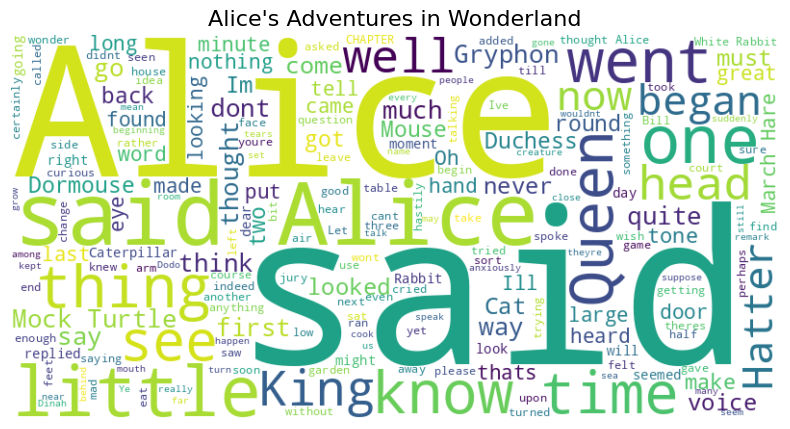

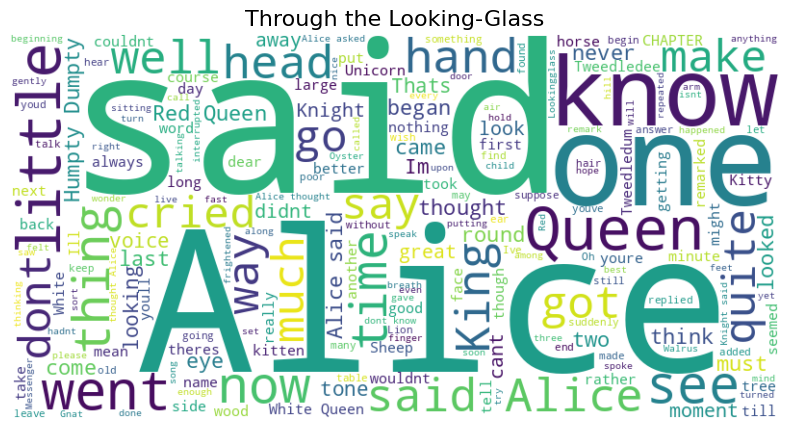

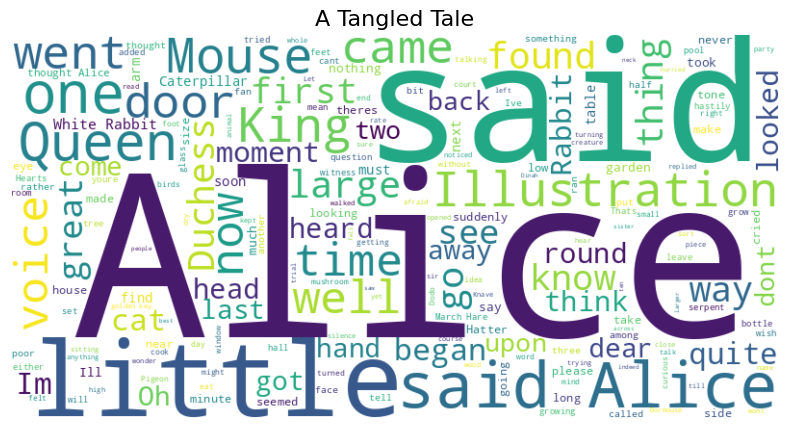

In [141]:
def plot_wordclouds(texts, titles):
    for i, text in enumerate(texts):
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

        plt.figure(figsize=(10,5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(titles[i], fontsize=16)
        plt.axis('off')
        plt.show()

urls = [
    "https://www.gutenberg.org/files/11/11-0.txt",
    "https://www.gutenberg.org/files/12/12-0.txt",
    "https://www.gutenberg.org/files/19033/19033-0.txt"
]
texts = load_and_clean_texts(urls)
titles = ["Alice's Adventures in Wonderland", "Through the Looking-Glass", "A Tangled Tale"]
plot_wordclouds(texts, titles)

In [142]:
#2. Use BoW method to check the five most frequent words in all the books

import requests
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

# Download stopwords if needed
nltk.download('stopwords')
nltk.download('punkt')

def load_and_clean_text(url):
    response = requests.get(url)
    response.raise_for_status()
    text = response.text

    # Extract main content
    start_match = re.search(r'\*\*\* START OF THIS PROJECT GUTENBERG EBOOK.*?\n', text, re.IGNORECASE)
    end_match = re.search(r'\*\*\* END OF THIS PROJECT GUTENBERG EBOOK.*?\n', text, re.IGNORECASE)

    if start_match and end_match:
        main_text = text[start_match.end():end_match.start()]
    else:
        main_text = text

    # Lowercase and remove non-alphabetic chars
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', main_text.lower())
    return cleaned_text

def get_top_words(urls, n=5):
    stop_words = set(stopwords.words('english'))
    all_tokens = []

    for url in urls:
        text = load_and_clean_text(url)
        tokens = word_tokenize(text)
        # Remove stopwords and single-letter tokens
        filtered_tokens = [token for token in tokens if token not in stop_words and len(token) > 1]
        all_tokens.extend(filtered_tokens)

    freq_dist = Counter(all_tokens)
    return freq_dist.most_common(n)

# URLs
urls = [
    "https://www.gutenberg.org/files/11/11-0.txt",
    "https://www.gutenberg.org/files/12/12-0.txt",
    "https://www.gutenberg.org/files/19033/19033-0.txt"
]

top_words = get_top_words(urls)
print("Top 5 most frequent words across all books:")
for word, freq in top_words:
    print(f"{word}: {freq}")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Top 5 most frequent words across all books:
said: 1076
alice: 989
little: 303
one: 278
queen: 277


In [143]:
#3. Print the BoW and identify the numbers: What is the document number? What is the index and what is how many times the word was found?
import requests
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

# Ensure stopwords and punkt are downloaded
nltk.download('stopwords')
nltk.download('punkt')

def load_and_clean_text(url):
    response = requests.get(url)
    response.raise_for_status()
    text = response.text

    start_match = re.search(r'\*\*\* START OF THIS PROJECT GUTENBERG EBOOK.*?\n', text, re.IGNORECASE)
    end_match = re.search(r'\*\*\* END OF THIS PROJECT GUTENBERG EBOOK.*?\n', text, re.IGNORECASE)

    if start_match and end_match:
        main_text = text[start_match.end():end_match.start()]
    else:
        main_text = text

    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', main_text.lower())
    return cleaned_text

def print_bow_with_indices(urls, top_n=10):
    stop_words = set(stopwords.words('english'))

    for doc_num, url in enumerate(urls, start=1):
        text = load_and_clean_text(url)
        tokens = word_tokenize(text)
        filtered_tokens = [t for t in tokens if t not in stop_words and len(t) > 1]

        freq_dist = Counter(filtered_tokens)
        most_common = freq_dist.most_common(top_n)

        print(f"\nDocument #{doc_num} ({url}): Top {top_n} words")
        print("Index | Word        | Frequency")
        print("------------------------------")
        for idx, (word, freq) in enumerate(most_common, start=1):
            print(f"{idx:<5} | {word:<10} | {freq}")

# URLs
urls = [
    "https://www.gutenberg.org/files/11/11-0.txt",
    "https://www.gutenberg.org/files/12/12-0.txt",
    "https://www.gutenberg.org/files/19033/19033-0.txt"
]

print_bow_with_indices(urls, top_n=5)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!



Document #1 (https://www.gutenberg.org/files/11/11-0.txt): Top 5 words
Index | Word        | Frequency
------------------------------
1     | said       | 462
2     | alice      | 385
3     | little     | 129
4     | one        | 101
5     | like       | 85

Document #2 (https://www.gutenberg.org/files/12/12-0.txt): Top 5 words
Index | Word        | Frequency
------------------------------
1     | said       | 470
2     | alice      | 441
3     | queen      | 181
4     | one        | 142
5     | know       | 123

Document #3 (https://www.gutenberg.org/files/19033/19033-0.txt): Top 5 words
Index | Word        | Frequency
------------------------------
1     | alice      | 163
2     | said       | 144
3     | little     | 59
4     | one        | 35
5     | like       | 34


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


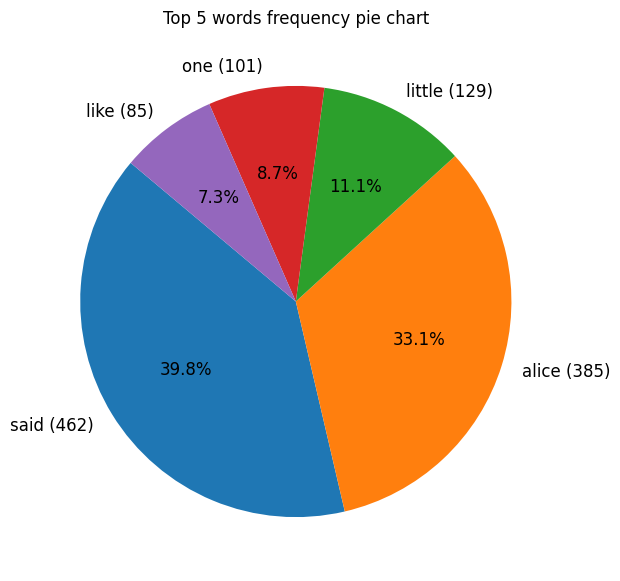

In [144]:
#4. Display a pie plot of the 5 most frequent words in the text. Add the word and its frequence as labels.
import requests
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt

# Download required resources (if not done yet)
nltk.download('stopwords')
nltk.download('punkt')

def load_and_clean_text(url):
    response = requests.get(url)
    response.raise_for_status()
    text = response.text

    start_match = re.search(r'\*\*\* START OF THIS PROJECT GUTENBERG EBOOK.*?\n', text, re.IGNORECASE)
    end_match = re.search(r'\*\*\* END OF THIS PROJECT GUTENBERG EBOOK.*?\n', text, re.IGNORECASE)

    if start_match and end_match:
        main_text = text[start_match.end():end_match.start()]
    else:
        main_text = text

    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', main_text.lower())
    return cleaned_text

def plot_top_words_pie(url, top_n=5):
    stop_words = set(stopwords.words('english'))
    text = load_and_clean_text(url)
    tokens = word_tokenize(text)
    filtered_tokens = [t for t in tokens if t not in stop_words and len(t) > 1]

    freq_dist = Counter(filtered_tokens)
    most_common = freq_dist.most_common(top_n)

    words, counts = zip(*most_common)
    labels = [f"{word} ({count})" for word, count in most_common]

    plt.figure(figsize=(7,7))
    plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12})
    plt.title(f"Top {top_n} words frequency pie chart")
    plt.show()

# Example usage - Alice’s Adventures in Wonderland
url = "https://www.gutenberg.org/files/11/11-0.txt"
plot_top_words_pie(url)


Analyse the outputs: Are those words informative? Are they insightful or expected?

Are those words informative?
Usually, the top frequent words after removing stopwords are character names, common nouns, or verbs related to the story.

For example, in Alice’s Adventures in Wonderland, you might see:

alice — obviously the main character, so very informative

said, like, went — common verbs/dialogue indicators, less informative

time, little — frequent descriptors, moderately informative

2. Are they insightful?
Some words like alice or queen (if they appear) directly tell you about the characters or key elements.

Other words like said, looked, went are expected because they indicate dialogue or action, but they don’t reveal much about themes or plot.

Words like little, time are quite generic and less insightful on their own.

3. Why does this happen?
Even after removing stopwords, very common verbs and adjectives still dominate frequency counts.

The BoW approach is purely frequency-based and ignores context, so it doesn't capture meaning or sentiment.

Without more advanced filtering (e.g., removing very common verbs or using TF-IDF), you get expected high-frequency function/action words.

4. How to get more insightful words?
Use named entity recognition (NER) to focus on proper nouns (people, places).

Apply TF-IDF weighting to highlight words that are more unique to a book.

Consider topic modeling or keyphrase extraction to find thematic words.

Filter out common verbs and adjectives manually or by POS tags.



In [145]:
#1. Create another BoW, now using TF-IDF as vectorizer.

from sklearn.feature_extraction.text import TfidfVectorizer
import requests
import re

# URLs of the books
urls = [
    "https://www.gutenberg.org/files/11/11-0.txt",
    "https://www.gutenberg.org/files/12/12-0.txt",
    "https://www.gutenberg.org/files/19033/19033-0.txt"
]

def load_and_clean_text(url):
    response = requests.get(url)
    response.raise_for_status()
    text = response.text
    start_match = re.search(r'\*\*\* START OF THIS PROJECT GUTENBERG EBOOK.*?\n', text, re.IGNORECASE)
    end_match = re.search(r'\*\*\* END OF THIS PROJECT GUTENBERG EBOOK.*?\n', text, re.IGNORECASE)
    if start_match and end_match:
        main_text = text[start_match.end():end_match.start()]
    else:
        main_text = text
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', main_text.lower())
    return cleaned_text

# Load and clean texts for all books
documents = [load_and_clean_text(url) for url in urls]

# Initialize TF-IDF Vectorizer with specified min_df and max_df
vectorizer = TfidfVectorizer(min_df=1, max_df=2, stop_words='english')

# Fit and transform the documents
tfidf_matrix = vectorizer.fit_transform(documents)

# Get feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Print the TF-IDF matrix shape (docs x words)
print("TF-IDF matrix shape:", tfidf_matrix.shape)

# For each document, print the top 5 words with highest TF-IDF scores
for doc_idx, doc_vector in enumerate(tfidf_matrix):
    print(f"\nTop words in Document {doc_idx+1}:")
    # Convert sparse matrix row to tuple (index, tfidf_score)
    scores = zip(doc_vector.indices, doc_vector.data)
    # Sort by TF-IDF score in descending order
    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
    # Print top 5 words with scores
    for idx, score in sorted_scores[:5]:
        print(f"{feature_names[idx]}: {score:.4f}")


TF-IDF matrix shape: (3, 3327)

Top words in Document 1:
mock: 0.3751
turtle: 0.3685
gryphon: 0.3619
hatter: 0.2753
rabbit: 0.2202

Top words in Document 2:
knight: 0.3550
humpty: 0.3427
dumpty: 0.3366
tweedledum: 0.2203
tweedledee: 0.1652

Top words in Document 3:
rabbit: 0.4635
mouse: 0.3888
duchess: 0.3140
caterpillar: 0.2093
hatter: 0.1645


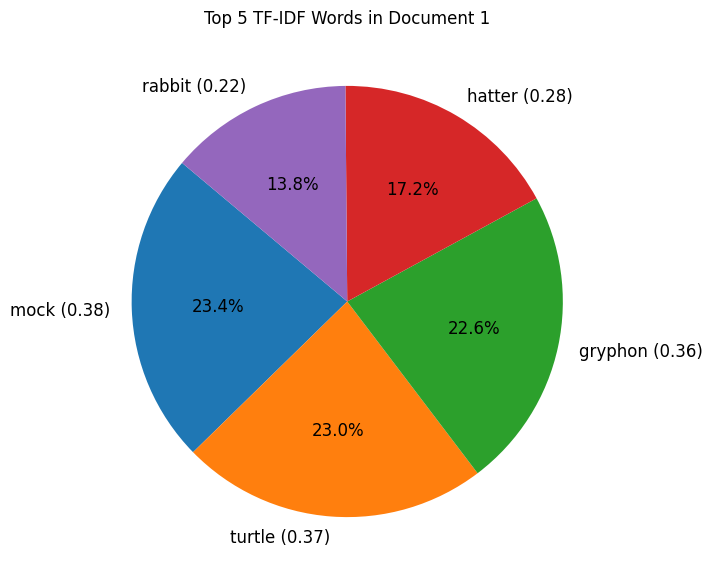

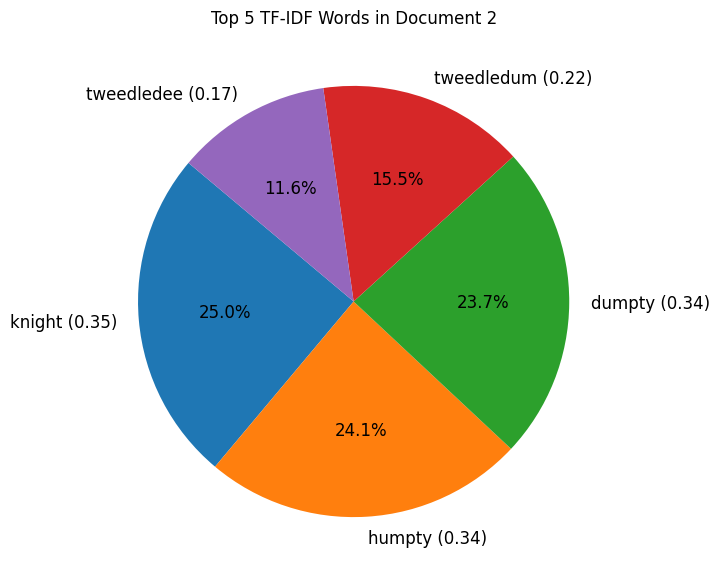

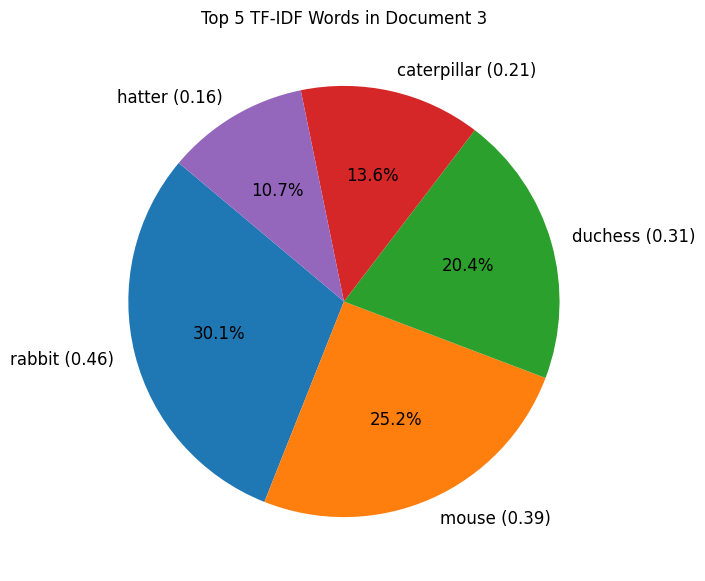

In [146]:
#2. Create again the pie plots with the new 5 most relevant words from each document.*import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
import re

urls = [
    "https://www.gutenberg.org/files/11/11-0.txt",
    "https://www.gutenberg.org/files/12/12-0.txt",
    "https://www.gutenberg.org/files/19033/19033-0.txt"
]

def load_and_clean_text(url):
    response = requests.get(url)
    response.raise_for_status()
    text = response.text
    start_match = re.search(r'\*\*\* START OF THIS PROJECT GUTENBERG EBOOK.*?\n', text, re.IGNORECASE)
    end_match = re.search(r'\*\*\* END OF THIS PROJECT GUTENBERG EBOOK.*?\n', text, re.IGNORECASE)
    if start_match and end_match:
        main_text = text[start_match.end():end_match.start()]
    else:
        main_text = text
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', main_text.lower())
    return cleaned_text

# Load texts
documents = [load_and_clean_text(url) for url in urls]

# TF-IDF vectorizer
vectorizer = TfidfVectorizer(min_df=1, max_df=2, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(documents)
feature_names = vectorizer.get_feature_names_out()

def plot_tfidf_pie(doc_vector, feature_names, doc_number, top_n=5):
    scores = list(zip(doc_vector.indices, doc_vector.data))
    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)[:top_n]
    words = [feature_names[idx] for idx, _ in sorted_scores]
    values = [score for _, score in sorted_scores]
    labels = [f"{word} ({value:.2f})" for word, value in zip(words, values)]

    plt.figure(figsize=(7,7))
    plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12})
    plt.title(f"Top {top_n} TF-IDF Words in Document {doc_number}")
    plt.show()

# Plot for each document
for i, doc_vec in enumerate(tfidf_matrix):
    plot_tfidf_pie(doc_vec, feature_names, i+1)
